<a href="https://colab.research.google.com/github/Git-Hub-Pro/Kalmanfilter/blob/master/AvgFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

재귀식인 평균 필터를 사용하면 직전 평균값과 데이터 개수만 알아도 쉽게 평균을 구할 수 있습니다.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [0]:
def get_volt():
    v = np.random.normal(0,4)      # 표준 편차 : 4
    volt_mean = 14.4               # 평균 :14.4 v
    volt_meas  = volt_mean + v     # 측정값
    return volt_meas

In [0]:
def avg_filter(k, x_meas, x_avg):   # 재귀식으로 구현된 평균 필터, 숫자의 개수와 입력받은 값, 평균을 통하여 다음 평균을 구할 수 있다.
    alpha = (k-1) / k
    x_avg = alpha * x_avg + (1-alpha)*x_meas
    return x_avg

In [0]:
# Input parameters.
time_end = 10     # 총 전압 측정 시간.
dt = 0.2          # 0.2초 간격으로 전압 측정.

In [0]:
time = np.arange(0,time_end,dt)
n_samples = len(time)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [0]:
x_avg = 0
for i in range(n_samples):
    k = i + 1
    x_meas = get_volt()
    x_avg = avg_filter(k,x_meas,x_avg)
    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

Text(0, 0.5, 'Volt [v]')

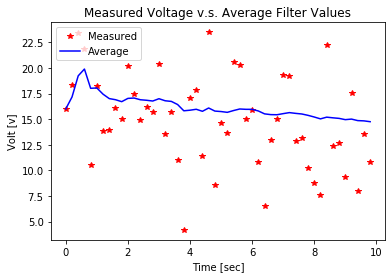

In [15]:
plt.plot(time,x_meas_save,'r*',label='Measured')
plt.plot(time,x_avg_save,'b-',label='Average')
plt.legend(loc='upper left')
plt.title('Measured Voltage v.s. Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Volt [v]')